In [1]:
import os
import sys
from functools import reduce

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [15]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from src.nb_utils import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context="talk")

# Do BBNs trained with SVI suffer from warm-up?

In [11]:
def make_experiment_name(root_path, cfg, pkl):
    warmup = "warmup" if "warmup" in cfg else "noWarmup"
    reset = "noReset"
    if "warmup" in cfg and cfg["warmup"]["reset_optim"]:
        reset = "reset"
    elif "warmup" not in cfg:
        reset = "n/a"
    name = f"{warmup}_{reset}"
    return "experiment", name

In [19]:
hyperparams = ["warmup.reset_optim", "_optim.name", "_optim.args.lr", "tst_mcs"]
metrics = ["acc"]
exp_paths = [
    "../results/2020Feb12-202405_warmup-reset/",
    "../results/2020Feb12-203148_warmup-noReset/",
    "../results/2020Feb14-083007_sviFull/"
]

trial_paths = {k: v for d in map(get_file_paths, exp_paths) for k, v in d.items()}
valid_data = get_data(trial_paths, hyperparams, metrics, log="valid", cb=make_experiment_name)
train_data = get_data(trial_paths, hyperparams, metrics + ["accMC"], log="train", cb=make_experiment_name)

Processing 96 trials.
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0004__optim___name____Adam____args_____lr___0.005___amsgrad___True____tst_mcs_16/1
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0004__optim___name____Adam____args_____lr___0.005___amsgrad___True____tst_mcs_16/0
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0000__optim___name____Adam____args_____lr___0.1___amsgrad___True____tst_mcs_16/1
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0000__optim___name____Adam____args_____lr___0.1___amsgrad___True____tst_mcs_16/0
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0012__optim___name____RMSprop____args_____lr___0.01___momentum___0.5____tst_mcs_16/1
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0012__optim___name____RMSprop____args_____lr___0.01___momentum___0.5____tst_mcs_16/0
Warning, no 

/home/fgogianu/Code/low_hanging_fruit/warmup_bnn/src/nb_utils.py:80: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(dataframes, ignore_index=True)


Processing 96 trials.
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0004__optim___name____Adam____args_____lr___0.005___amsgrad___True____tst_mcs_16/1
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0004__optim___name____Adam____args_____lr___0.005___amsgrad___True____tst_mcs_16/0
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0000__optim___name____Adam____args_____lr___0.1___amsgrad___True____tst_mcs_16/1
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0000__optim___name____Adam____args_____lr___0.1___amsgrad___True____tst_mcs_16/0
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0012__optim___name____RMSprop____args_____lr___0.01___momentum___0.5____tst_mcs_16/1
Warning, no warmup.reset_optim key in cfg ../results/2020Feb14-083007_sviFull/0012__optim___name____RMSprop____args_____lr___0.01___momentum___0.5____tst_mcs_16/0
Warning, no 

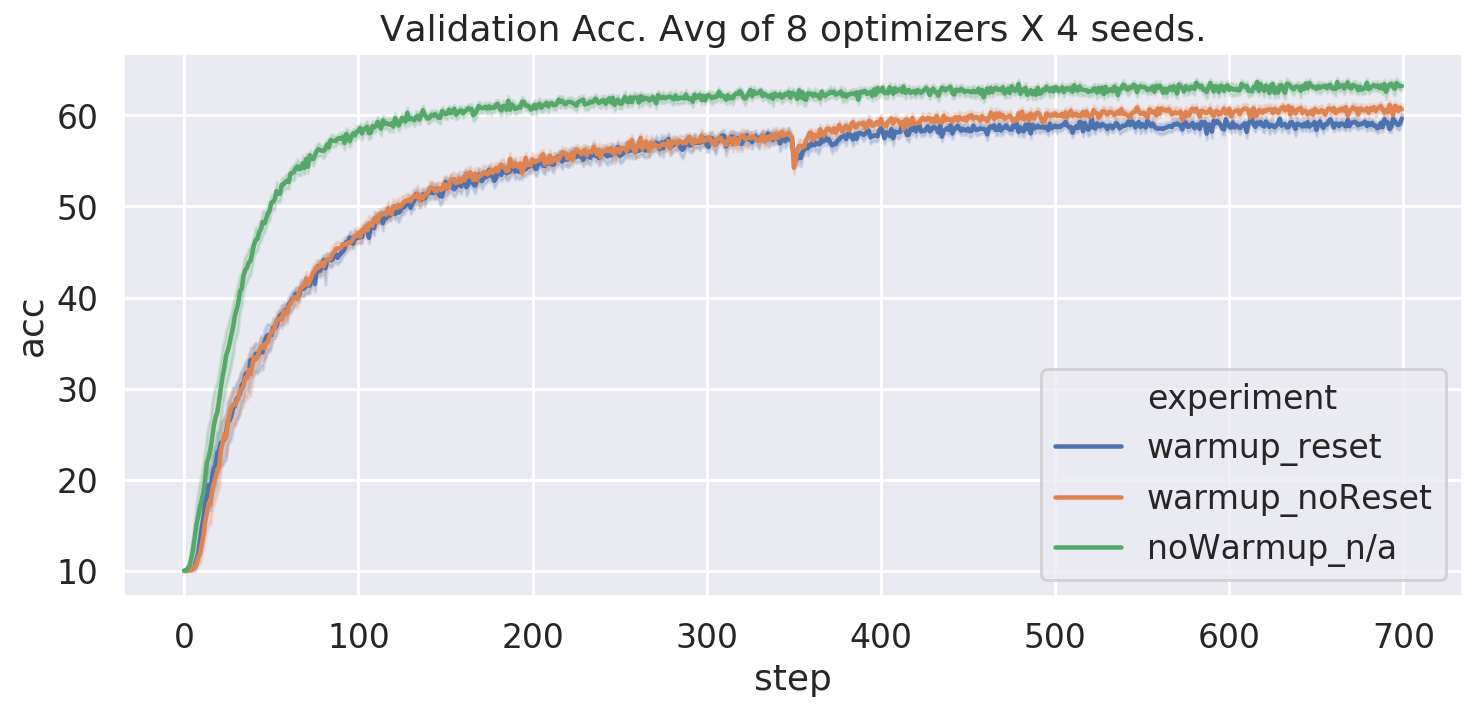

In [16]:
plot(valid_data, x="step", y="acc", hue="experiment", window=0, width=12, height=5,
     title="Validation Acc. Avg of 8 optimizers X 4 seeds.")

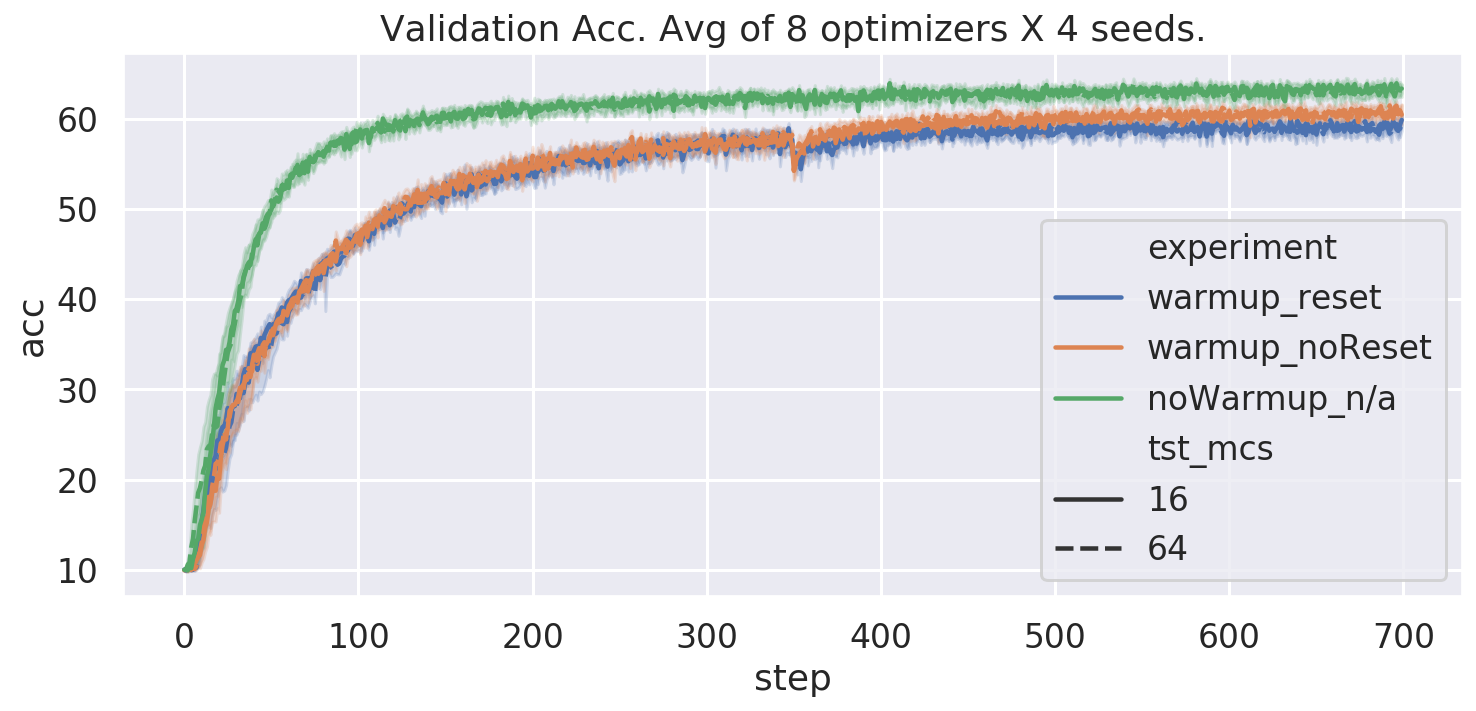

In [22]:
plot(valid_data, x="step", y="acc", hue="experiment", style="tst_mcs", window=0, width=12, height=5,
     title="Validation Acc. Avg of 8 optimizers X 4 seeds.")

### How about at train time?

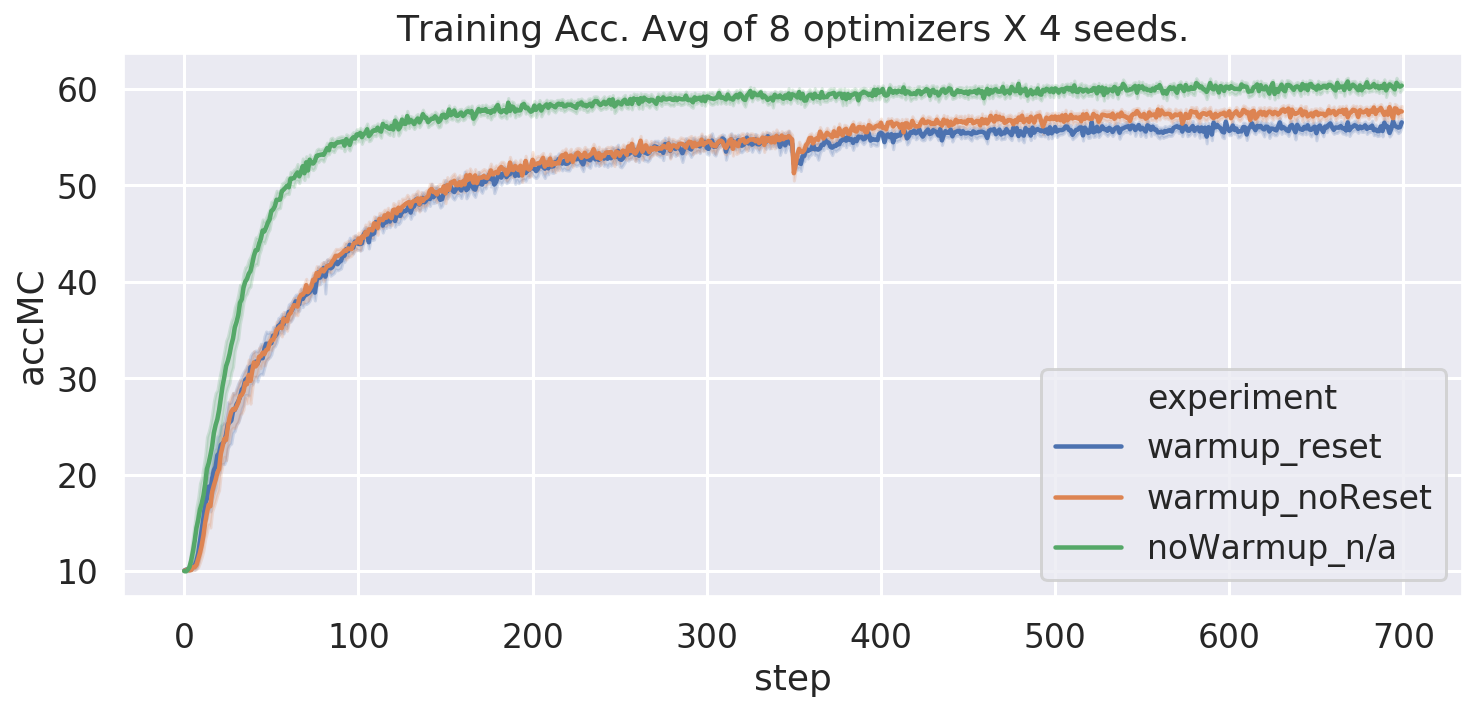

In [21]:
plot(train_data, x="step", y="accMC", hue="experiment", window=0, width=12, height=5,
     title="Training Acc. Avg of 8 optimizers X 4 seeds.")